# General Imports

In [68]:
import os
import librosa
import librosa.display
import IPython.display as ipd
from matplotlib import pyplot as plt
import numpy as np
import pickle

# Testing

Testing the pipe line on a one audio file for now

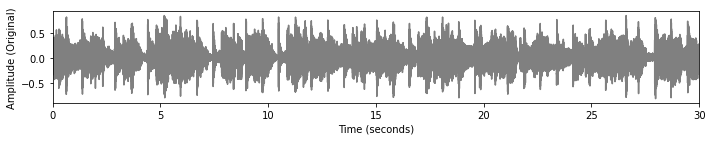

In [69]:
# For now just testing with one
audio_file = 'database_recordings/database_recordings/pop.00099.wav'

# Load audio
x, sr = librosa.load(os.path.join(audio_file))
ipd.display(ipd.Audio(x, rate=sr))

# Plot audio
t1 = np.arange(x.shape[0]) / sr
plt.figure(figsize=(10, 2))
plt.plot(t1, x, color='gray')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (Original)')
plt.xlim([t1[0], t1[-1]])
plt.tight_layout()

# Loading stft 
D = np.abs(librosa.stft(x, n_fft=1024, window='hann' ,win_length=1024, hop_length=512))

### Peak Picking

Lab implementation of pick peak.

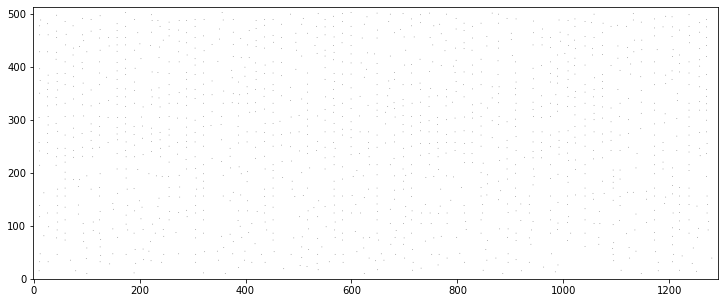

In [75]:
from skimage.feature import peak_local_max

coordinates = peak_local_max(np.log(D), min_distance=10, indices = False)
plt.figure(figsize=(20, 5))
plt.imshow(coordinates, cmap=plt.cm.gray_r, origin='lower')

My implementation of pick peak.

- Has an option for varying shape types and shape size for the kernel. Out of all the shapes it is hypothesised that disk will do best, as it considers points closest at a consistent distance/radius. 
- It is also hypothesised that enabling uniformity may benefit in indexing the database recordings but not the query recordings. In indexing the database, uniformity can pick up features with most repetitions or prominence for representing the song. But in indexing the queries, quality is much less consistent with more noise - to the point where important song features may even lie outside the normal distribution of amplitudes. These will need to be investigated more thoroughly later on.

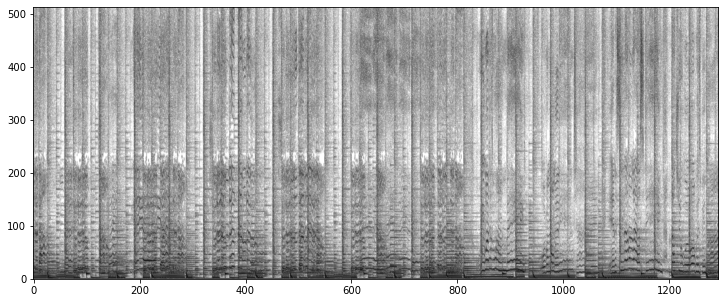

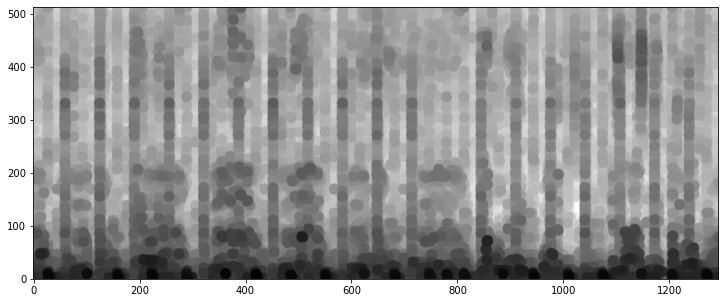

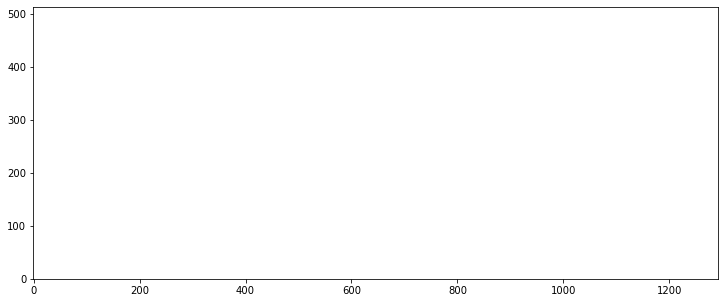

In [128]:
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import matplotlib.pyplot as plt
from skimage.morphology import disk, diamond, square

# Custom implementation for picking peaks
def pick_peaks(D, shape='square', size=10, uniform=True, show=False, title=None,):
    
    # The only shapes available are square, diamond and disk.
    assert shape == 'square' or shape == 'diamond' or shape == 'disk',\
    'Parameter shape must be set to \'disk\', \'diamond\' or \'square\''
    
    # Compute the constillation map
    data = np.log(D)
    footprint = eval(shape + '(' + str(size) + ')')  # formulates kernel from params
    max_blobs = ndimage.maximum_filter(data, footprint=footprint)
    const_map = data == max_blobs
    
    # Only considers the points within a normal distribution
    if uniform: 
        stdev = np.std(max_blobs)
        mean = np.mean(max_blobs)
        distribution = np.multiply(data >= mean-stdev, data <= mean+stdev)
        const_map = np.multiply(const_map, distribution)
    
    if(show):
        plt.figure(figsize=(20, 5))
        plt.imshow(librosa.amplitude_to_db(D,ref=np.max), origin='lower', cmap='gray_r')

        plt.figure(figsize=(20, 5))
        plt.imshow(max_blobs, origin='lower', cmap='gray_r')
        
        plt.figure(figsize=(20, 5))
        if(title): plt.title(title)
        plt.imshow(const_map, origin='lower', cmap='gray_r')
        
    # Gets coordinate information
    freq_y, time_x = np.nonzero(const_map) 
    coordinates = list(zip(freq_y, time_x))
    
    # Sorts with respect to time then frequency
    coordinates = sorted(coordinates , key=lambda p: [p[1], p[0]])
    
    return coordinates

# My solution
peaks = pick_peaks(D, show=True, shape='disk', size=10)

### Hashing

In [105]:
def hash_peaks(peaks, size):
    
    d = {}

    for i in range(len(peaks)):
        for j in range(1, size):
            

    
    
    
    return peaks
    
hash_peaks(peaks)

[(3, 0),
 (233, 0),
 (254, 0),
 (282, 1),
 (309, 1),
 (367, 1),
 (71, 4),
 (154, 5),
 (444, 5),
 (196, 7),
 (331, 7),
 (85, 8),
 (411, 8),
 (15, 11),
 (257, 11),
 (277, 11),
 (304, 11),
 (32, 12),
 (117, 12),
 (138, 12),
 (214, 12),
 (241, 12),
 (350, 12),
 (396, 12),
 (428, 12),
 (460, 12),
 (477, 12),
 (47, 13),
 (360, 13),
 (374, 13),
 (488, 14),
 (81, 20),
 (162, 20),
 (124, 27),
 (147, 27),
 (207, 27),
 (236, 27),
 (257, 27),
 (274, 27),
 (326, 27),
 (343, 27),
 (357, 27),
 (428, 27),
 (481, 27),
 (512, 27),
 (32, 28),
 (290, 28),
 (306, 28),
 (369, 28),
 (384, 28),
 (460, 28),
 (4, 29),
 (98, 29),
 (214, 43),
 (293, 43),
 (342, 43),
 (414, 43),
 (64, 44),
 (77, 44),
 (230, 44),
 (328, 44),
 (427, 44),
 (455, 44),
 (467, 44),
 (497, 44),
 (31, 45),
 (46, 45),
 (92, 45),
 (124, 45),
 (156, 45),
 (372, 45),
 (387, 45),
 (403, 45),
 (107, 46),
 (138, 46),
 (169, 46),
 (246, 46),
 (278, 46),
 (356, 46),
 (3, 60),
 (73, 60),
 (86, 60),
 (111, 60),
 (135, 60),
 (156, 60),
 (171, 60),
 (

# Execution

Running on all the files of the dataset.